In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [2]:
import pyvisa
#import keyboard
import csv

In [3]:
class Info:
    icase = 6
    icmd = 1
    a0 = -20.
    a1 = 20.
    b0 = -20.
    b1 = 20.
    ndim = 2
    ntrain0 = 36
    nn1 = 200
    nn2 = 200
    tolsig = 1e-3
    models12 = False
    rm = None
    yokogawa = None
    yokogawa2 = None
    multimeter = None
    fname_accum = 'daccum.txt'
    gname_accum = 'accum.txt'

In [4]:
class GP():
    def __init__(self, ndim):
        self.ndim = ndim
        if True:
            #    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
            self.kernel = ConstantKernel(1.0, constant_value_bounds="fixed") * \
                RBF(1.0, length_scale_bounds="fixed")
        else:
            self.kernel = DotProduct() + WhiteKernel()
        self.gp = GaussianProcessRegressor(
            kernel=self.kernel, n_restarts_optimizer=0)

    def train0(self):
        ntrain1 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain1 = ntrain1+1
            afile.close()
            X = np.zeros((ntrain1, self.ndim))
            y = np.zeros(ntrain1)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            self.gp.fit(X, y)
            del X, y, ntrain1, i, j, line

    def predict(self, X_test):
        y_pred, y_std = self.gp.predict(X_test, return_std=True)
        return y_pred, y_std

    def tpredict(self, X_test):
        ntrain01 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain01 = ntrain01+1
            afile.close()
            X = np.zeros((ntrain01, self.ndim))
            y = np.zeros(ntrain01)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            ntrain1 = i
            self.gp.fit(X, y)
            del X, y, i, ntrain1, line, ntrain01, j
        y_pred, y_std = self.gp.predict(X_test, return_std=True)
        return y_pred, y_std

In [5]:
class Multi_knn():
    def __init__(self, ndim, models12):
        self.ndim = ndim
        self.models12 = models12
        self.knn4 = KNeighborsRegressor(
            n_neighbors=4, leaf_size=30, p=2,  weights='distance')
        self.knn5 = KNeighborsRegressor(
            n_neighbors=5, leaf_size=30, p=2,  weights='distance')
        self.knn6 = KNeighborsRegressor(
            n_neighbors=6, leaf_size=30, p=2,  weights='distance')
        self.knn7 = KNeighborsRegressor(
            n_neighbors=7, leaf_size=30, p=2,  weights='distance')
        self.knn8 = KNeighborsRegressor(
            n_neighbors=8, leaf_size=30, p=2,  weights='distance')
        self.knn9 = KNeighborsRegressor(
            n_neighbors=9, leaf_size=30, p=2,  weights='distance')
        if models12:
            self.knn41 = KNeighborsRegressor(
                n_neighbors=4, leaf_size=30, p=1.5, weights='distance')
            self.knn51 = KNeighborsRegressor(
                n_neighbors=5, leaf_size=30, p=1.5, weights='distance')
            self.knn61 = KNeighborsRegressor(
                n_neighbors=6, leaf_size=30, p=1.5, weights='distance')
            self.knn71 = KNeighborsRegressor(
                n_neighbors=7, leaf_size=30, p=1.5, weights='distance')
            self.knn81 = KNeighborsRegressor(
                n_neighbors=8, leaf_size=30, p=1.5, weights='distance')
            self.knn91 = KNeighborsRegressor(
                n_neighbors=9, leaf_size=30, p=1.5, weights='distance')

    def train0(self):
        ntrain1 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain1 = ntrain1+1
            afile.close()
            X = np.zeros((ntrain1, self.ndim))
            y = np.zeros(ntrain1)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            self.knn4.fit(X, y)
            self.knn5.fit(X, y)
            self.knn6.fit(X, y)
            self.knn7.fit(X, y)
            self.knn8.fit(X, y)
            self.knn9.fit(X, y)
            if self.models12:
                self.knn41.fit(X, y)
                self.knn51.fit(X, y)
                self.knn61.fit(X, y)
                self.knn71.fit(X, y)
                self.knn81.fit(X, y)
                self.knn91.fit(X, y)
            del X, y, ntrain1, i, j, line

    def predict(self, X_test):
        anarray = []
        ypred = self.knn4.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn5.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn6.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn7.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn8.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn9.predict(X_test)
        anarray.append(ypred)
        if self.models12:
            ypred = self.knn41.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn51.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn61.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn71.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn81.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn91.predict(X_test)
            anarray.append(ypred)
        anarray = np.array(anarray)
        return np.mean(anarray), np.std(anarray)

    def tpredict(self, X_test):
        ntrain01 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain01 = ntrain01+1
            afile.close()
            X = np.zeros((ntrain01, self.ndim))
            y = np.zeros(ntrain01)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            ntrain1 = i
            self.knn4.fit(X, y)
            self.knn5.fit(X, y)
            self.knn6.fit(X, y)
            self.knn7.fit(X, y)
            self.knn8.fit(X, y)
            self.knn9.fit(X, y)
            if self.models12:
                self.knn41.fit(X, y)
                self.knn51.fit(X, y)
                self.knn61.fit(X, y)
                self.knn71.fit(X, y)
                self.knn81.fit(X, y)
                self.knn91.fit(X, y)
            del X, y, ntrain1, ntrain01, i, j, line
        anarray = []
        ypred = self.knn4.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn5.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn6.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn7.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn8.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn9.predict(X_test)
        anarray.append(ypred)
        if self.models12:
            ypred = self.knn41.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn51.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn61.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn71.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn81.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn91.predict(X_test)
            anarray.append(ypred)
        anarray = np.array(anarray)
        return np.mean(anarray), np.std(anarray)

In [6]:
def append_new_line(file_name, text_to_append):
    with open(file_name, "a+") as file_object:
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        file_object.write(text_to_append)


def append_multiple_lines(file_name, lines_to_append):
    with open(file_name, "a+") as file_object:
        appendEOL = False
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            appendEOL = True
        for line in lines_to_append:
            if appendEOL == True:
                file_object.write("\n")
            else:
                appendEOL = True
            file_object.write(line)

In [7]:
def afun0(x, y):
    icase = Info.icase
    if icase == 0:
        tmp = np.exp(-((x-0.)/4.)**2-((y-0.)/2)**2)
    if icase == 1:
        tmq = np.exp(-((x-0.)/3.)**2-((y-0.)/2.)**2)
        tmp = np.sin(x+y)+(x-y)**2-1.5*x+2.5*y + 1
        tmp = tmp * tmq
    if icase == 11:
        tmq = np.exp(-((x-0.)/4)**2-((y-0.)/2)**2)
        tmp = (1.5-x+x*y)**2 + (2.25-x+x*y**2)**2 + (2.625-x+x*y**3)**2
        tmp = tmp * tmq
    if icase == 2:
        tmq = np.exp(-((x-0.)/4.)**2-((y-0.)/2)**2)
        tmp = -20.*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2)))-np.exp(0.5 *
                                                                (np.cos(np.pi*2*x)+np.cos(np.pi*2*y)))+np.exp(1.)+20.
        tmp = tmp * tmq
    if icase == 3:
        tmq = np.exp(-((x-0.)/4)**2-((y-0.)/2)**2)
        tmp = (1.+(x+y+1)**2 * (19.-14*x+3.*x**2-14*y + 6*x*y+3*y**2)) * \
            (30.+(2*x-3*y)**2 * (18-32*x+12*x**2 + 48*y - 36*x*y + 27*y**2))
        tmp = tmp * tmq
    if icase == 4:
        tmq = np.exp(-((x-0.)/4)**2-((y-0.)/2)**2)
        tmp = (x**2 + y-11)**2 + (x+y**2-7)**2
        tmp = tmp * tmq
    if icase == 5:
        tmq = np.exp(-((x-0.)/4)**2-((y-0.)/2)**2)
        tmp = (x**4 - 16*x**2 + 5*x + y**4 - 16*y**2 + 5*y)/2.
        tmp = tmp * tmq
    if icase == 6:
        tmp = np.cos(0.1*x) * np.cos(0.2*y)
    if icase == 7:
        tmp = np.sin(0.1*x) ** 2 + np.cos(0.2*y) ** 2
    if icase == 8:
        tmp = np.cos(0.1*x + np.sin(0.2*y))
    if icase == 9:
        tmp = np.cos(0.1*x) + np.sin(0.2*y)
    if icase == 10:
        r = np.sqrt(x**2+y**2)
        if r < 1e-10:
            tmp = 1.
        else:
            tmp = np.sin(r)/r
    return tmp

In [8]:
# def afun(x, y):
#     deltax = 0.01
#     xm1 = x-deltax
#     Info.yokogawa.write(f'S{xm1:0.5f}E')
#     Info.yokogawa2.write(f'S{y:0.5f}E')
#     time.sleep(0.1)
#     tmpm1 = float(Info.multimeter.query("READ?"))
#     xp1 = x+deltax
#     Info.yokogawa.write(f'S{xp1:0.5f}E')
#     Info.yokogawa2.write(f'S{y:0.5f}E')
#     time.sleep(0.1)
#     tmpp1 = float(Info.multimeter.query("READ?"))
#     tmp1 = (tmpp1-tmpm1)/(2*deltax)
#     if False:
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmp = float(Info.multimeter.query("READ?"))
#         tmp2 = (tmpp1 - 2*tmp + tmmm1)/(deltax**2)
#     return tmp1

In [9]:
def afun(x, y):
    deltax = 0.01
    if False:
        Info.yokogawa.write(f'S{x:0.5f}E')
        Info.yokogawa2.write(f'S{y:0.5f}E')
        time.sleep(0.1)
        tmp1 = float(Info.multimeter.query("READ?"))
    if True:
        if True:
            Info.yokogawa.write(f'S{x:0.5f}E')
            Info.yokogawa2.write(f'S{y:0.5f}E')
            time.sleep(0.1)
            tmp1 = float(Info.multimeter.query("READ?"))
            lines_to_append = []
            astring = str(x)+' '+str(y) + ' ' + str(tmp1)
            lines_to_append.append(astring)
            append_multiple_lines(Info.gname_accum, lines_to_append)
        xm1 = x-deltax
        Info.yokogawa.write(f'S{xm1:0.5f}E')
        Info.yokogawa2.write(f'S{y:0.5f}E')
        time.sleep(0.1)
        tmpm1 = float(Info.multimeter.query("READ?"))
        xp1 = x+deltax
        Info.yokogawa.write(f'S{xp1:0.5f}E')
        Info.yokogawa2.write(f'S{y:0.5f}E')
        time.sleep(0.1)
        tmpp1 = float(Info.multimeter.query("READ?"))
        tmp1 = (tmpp1-tmpm1)/(2*deltax)
        if False:
            Info.yokogawa.write(f'S{x:0.5f}E')
            Info.yokogawa2.write(f'S{y:0.5f}E')
            time.sleep(0.1)
            tmp = float(Info.multimeter.query("READ?"))
            tmp2 = (tmpp1 - 2*tmp + tmpm1)/(deltax**2)
            tmp1 = tmp2
    if False:
        xm2 = x-2*deltax
        xm1 = x-deltax
        xp1 = x+deltax
        xp2 = x+2*deltax
        Info.yokogawa.write(f'S{xm2:0.5f}E')
        Info.yokogawa2.write(f'S{y:0.5f}E')
        time.sleep(0.1)
        tmpm2 = float(Info.multimeter.query("READ?"))
        Info.yokogawa.write(f'S{xm1:0.5f}E')
        Info.yokogawa2.write(f'S{y:0.5f}E')
        time.sleep(0.1)
        tmpm1 = float(Info.multimeter.query("READ?"))
        Info.yokogawa.write(f'S{xp1:0.5f}E')
        Info.yokogawa2.write(f'S{y:0.5f}E')
        time.sleep(0.1)
        tmpp1 = float(Info.multimeter.query("READ?"))
        Info.yokogawa.write(f'S{xp2:0.5f}E')
        Info.yokogawa2.write(f'S{y:0.5f}E')
        time.sleep(0.1)
        tmpp2 = float(Info.multimeter.query("READ?"))
        tmp1 = (-tmpp2+8*tmpp1-8*tmpm1+tmpm2)/(12*deltax)
        if False:
            Info.yokogawa.write(f'S{x:0.5f}E')
            Info.yokogawa2.write(f'S{y:0.5f}E')
            time.sleep(0.1)
            tmp = float(Info.multimeter.query("READ?"))
            tmp2 = (-tmpp2+16*tmpp1 - 30*tmp + 16*tmpm1 - tmpm2)/(12*deltax**2)
            tmp1 = tmp2
    return tmp1

In [10]:
##df/dxdy tward arbitrary direction by ihlee

# def get_dfdx_dfdy(x, y):
#     if True
#         deltax = 0.01
#         xm1 = x-deltax
#         Info.yokogawa.write(f'S{xm1:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpm1 = float(Info.multimeter.query("READ?"))
#         xp1 = x+deltax
#         Info.yokogawa.write(f'S{xp1:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpp1 = float(Info.multimeter.query("READ?"))
#         tmp1 = (tmpp1-tmpm1)/(2*deltax)
#         if False:
#             Info.yokogawa.write(f'S{x:0.5f}E')
#             Info.yokogawa2.write(f'S{y:0.5f}E')
#             time.sleep(0.1)
#             tmp = float(Info.multimeter.query("READ?"))
#             tmp2 = (tmpp1 - 2*tmp + tmpm1)/(deltax**2)
#     if False:
#         deltax = 0.01
#         xm2 = x-2*deltax
#         xm1 = x-deltax
#         xp1 = x+deltax
#         xp2 = x+2*deltax
#         Info.yokogawa.write(f'S{xm2:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpm2 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{xm1:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpm1 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{xp1:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpp1 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{xp2:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpp2 = float(Info.multimeter.query("READ?"))
#         tmp1 = (-tmpp2+8*tmpp1-8*tmpm1+tmpm2)/(12*deltax)
#         if False:
#             Info.yokogawa.write(f'S{x:0.5f}E')
#             Info.yokogawa2.write(f'S{y:0.5f}E')
#             time.sleep(0.1)
#             tmp = float(Info.multimeter.query("READ?"))
#             tmp2 = (-tmpp2+16*tmpp1 - 30*tmp + 16*tmpm1 - tmpm2)/(12*deltax**2)
#     dfdx = tmp1
#     if True:
#         deltay = 0.01
#         ym1 = y-deltay
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{ym1:0.5f}E')
#         time.sleep(0.1)
#         tmpm1 = float(Info.multimeter.query("READ?"))
#         yp1 = y+deltay
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{yp1:0.5f}E')
#         time.sleep(0.1)
#         tmpp1 = float(Info.multimeter.query("READ?"))
#         tmp1 = (tmpp1-tmpm1)/(2*deltay)
#         if False:
#             Info.yokogawa.write(f'S{x:0.5f}E')
#             Info.yokogawa2.write(f'S{y:0.5f}E')
#             time.sleep(0.1)
#             tmp = float(Info.multimeter.query("READ?"))
#             tmp2 = (tmpp1 - 2*tmp + tmpm1)/(deltay**2)
#     if False:
#         deltay = 0.01
#         ym2 = y-2*deltay
#         ym1 = y-deltay
#         yp1 = y+deltay
#         yp2 = y+2*deltay
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{ym2:0.5f}E')
#         time.sleep(0.1)
#         tmpm2 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{ym1:0.5f}E')
#         time.sleep(0.1)
#         tmpm1 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{yp1:0.5f}E')
#         time.sleep(0.1)
#         tmpp1 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{yp2:0.5f}E')
#         time.sleep(0.1)
#         tmpp2 = float(Info.multimeter.query("READ?"))
#         tmp1 = (-tmpp2+8*tmpp1-8*tmpm1+tmpm2)/(12*deltay)
#         if False:
#             Info.yokogawa.write(f'S{x:0.5f}E')
#             Info.yokogawa2.write(f'S{y:0.5f}E')
#             time.sleep(0.1)
#             tmp = float(Info.multimeter.query("READ?"))
#             tmp2 = (-tmpp2+16*tmpp1 - 30*tmp + 16 *
#                     tmpm1 - tmpm2)/(12*deltay**2)
#     dfdy = tmp1
#     return dfdx, dfdy



# def get_abs_df(x, y):
#     dfdx, dfdy = get_dfdx_dfdy(x, y)
#     tmp = np.sqrt(dfdx**2+dfdy**2)
#     return tmp


# def afun(x, y):
#     if True:
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmp1 = float(Info.multimeter.query("READ?"))
#     if False:
#         deltax = 0.01
#         xm1 = x-deltax
#         Info.yokogawa.write(f'S{xm1:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpm1 = float(Info.multimeter.query("READ?"))
#         xp1 = x+deltax
#         Info.yokogawa.write(f'S{xp1:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpp1 = float(Info.multimeter.query("READ?"))
#         tmp1 = (tmpp1-tmpm1)/(2*deltax)
#         if False:
#             Info.yokogawa.write(f'S{x:0.5f}E')
#             Info.yokogawa2.write(f'S{y:0.5f}E')
#             time.sleep(0.1)
#             tmp = float(Info.multimeter.query("READ?"))
#             tmp2 = (tmpp1 - 2*tmp + tmpm1)/(deltax**2)
#     if False:
#         deltax = 0.01
#         xm2 = x-2*deltax
#         xm1 = x-deltax
#         xp1 = x+deltax
#         xp2 = x+2*deltax
#         Info.yokogawa.write(f'S{xm2:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpm2 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{xm1:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpm1 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{xp1:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpp1 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{xp2:0.5f}E')
#         Info.yokogawa2.write(f'S{y:0.5f}E')
#         time.sleep(0.1)
#         tmpp2 = float(Info.multimeter.query("READ?"))
#         tmp1 = (-tmpp2+8*tmpp1-8*tmpm1+tmpm2)/(12*deltax)
#         if False:
#             Info.yokogawa.write(f'S{x:0.5f}E')
#             Info.yokogawa2.write(f'S{y:0.5f}E')
#             time.sleep(0.1)
#             tmp = float(Info.multimeter.query("READ?"))
#             tmp2 = (-tmpp2+16*tmpp1 - 30*tmp + 16*tmpm1 - tmpm2)/(12*deltax**2)
#     if False:
#         deltay = 0.01
#         ym1 = y-deltay
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{ym1:0.5f}E')
#         time.sleep(0.1)
#         tmpm1 = float(Info.multimeter.query("READ?"))
#         yp1 = y+deltay
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{yp1:0.5f}E')
#         time.sleep(0.1)
#         tmpp1 = float(Info.multimeter.query("READ?"))
#         tmp1 = (tmpp1-tmpm1)/(2*deltay)
#         if False:
#             Info.yokogawa.write(f'S{x:0.5f}E')
#             Info.yokogawa2.write(f'S{y:0.5f}E')
#             time.sleep(0.1)
#             tmp = float(Info.multimeter.query("READ?"))
#             tmp2 = (tmpp1 - 2*tmp + tmpm1)/(deltay**2)
#     if False:
#         deltay = 0.01
#         ym2 = y-2*deltay
#         ym1 = y-deltay
#         yp1 = y+deltay
#         yp2 = y+2*deltay
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{ym2:0.5f}E')
#         time.sleep(0.1)
#         tmpm2 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{ym1:0.5f}E')
#         time.sleep(0.1)
#         tmpm1 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{yp1:0.5f}E')
#         time.sleep(0.1)
#         tmpp1 = float(Info.multimeter.query("READ?"))
#         Info.yokogawa.write(f'S{x:0.5f}E')
#         Info.yokogawa2.write(f'S{yp2:0.5f}E')
#         time.sleep(0.1)
#         tmpp2 = float(Info.multimeter.query("READ?"))
#         tmp1 = (-tmpp2+8*tmpp1-8*tmpm1+tmpm2)/(12*deltay)
#         if False:
#             Info.yokogawa.write(f'S{x:0.5f}E')
#             Info.yokogawa2.write(f'S{y:0.5f}E')
#             time.sleep(0.1)
#             tmp = float(Info.multimeter.query("READ?"))
#             tmp2 = (-tmpp2+16*tmpp1 - 30*tmp + 16 *
#                     tmpm1 - tmpm2)/(12*deltay**2)
#     if False:
#         tmp1 = get_abs_df(x,y)
#     return tmp1

In [11]:
def driver1():
    print(Info.ndim, ' dimensions')
    if Info.ndim == 2:
        print(Info.a0, Info.a1, Info.b0, Info.b1, ' boundary parameters')
        print(Info.nn1, Info.nn2, Info.tolsig, ' n1, n2, tolsig')
    print(Info.ntrain0, ' initial points')

    start = time.time()
    if Info.ndim == 2:
        a0 = Info.a0
        a1 = Info.a1
        b0 = Info.b0
        b1 = Info.b1
        nn1 = Info.nn1
        nn2 = Info.nn2
        itest = np.zeros((nn1, nn2))

    ndim = Info.ndim
    ntrain0 = Info.ntrain0
    tolsig = Info.tolsig
    models12 = Info.models12
    ntrain = ntrain0

    if os.path.isfile(Info.fname_accum):
        fname = 'daccum_'+str(np.random.randint(1000000))+'.txt'
        shutil.copyfile(Info.fname_accum, fname)
        os.remove(Info.fname_accum)
    if os.path.isfile(Info.gname_accum):
        gname = 'accum_'+str(np.random.randint(1000000))+'.txt'
        shutil.copyfile(Info.gname_accum, gname)
        os.remove(Info.gname_accum)    
    X_train = np.zeros((ntrain0, ndim))
    y_train = np.zeros(ntrain0)
    if ndim == 2:
        alist = []
        blist = []
        iskip = np.sqrt(float(nn1*nn2) / ntrain0)
        iskip = int(iskip)
        if iskip < 1:
            iskip = 1
        i = 0
        for ii in range(0, nn1, iskip):
            for jj in range(0, nn2, iskip):
                if i < ntrain0:
                    alist.append((a1-a0)*float(ii)/float(nn1-1)+a0)
                    blist.append((b1-b0)*float(jj)/float(nn2-1)+b0)
                i = i + 1
        for i in range(ntrain0):
            X_train[i, 0] = alist[i]
            X_train[i, 1] = blist[i]
            y_train[i] = afun(X_train[i, 0], X_train[i, 1])
            lines_to_append = []
            astring = ''
            for j in range(ndim):
                astring = astring+' '+str(X_train[i, j])
            astring = astring+' '+str(y_train[i])
            lines_to_append.append(astring)
            append_multiple_lines(Info.fname_accum, lines_to_append)
        print('coarse', ntrain0)
    else:
        print('not yet')
        for i in range(ntrain0):
            for j in range(ndim):
                X_train[i, j] = np.random.random()
            y_train[i] = 1.

    if Info.icmd == 1:
        multi = Multi_knn(ndim, models12)
        if models12:
            print('Multi_knn', 12)
        else:
            print('Multi_knn', 6)
    else:
        multi = GP(ndim)
        print('GP')
    multi.train0()
    print('train0: the first training')
    X_test = np.zeros((1, ndim))
    for iskip in range(33, 1, -1):
        for ii in range(0, nn1, iskip):
            alist = []
            for jj in range(0, nn2, iskip):
                alist.append(jj)
            if ii % 2 == 1:
                alist.reverse()
            for jj in alist:
                if ndim == 2:
                    X_test[0, 0] = (a1-a0)*float(ii)/float(nn1-1)+a0
                    X_test[0, 1] = (b1-b0)*float(jj)/float(nn2-1)+b0
                    y_pred, y_std = multi.predict(X_test)
                else:
                    print('not yet')
                if y_std < tolsig:
                    tmp = y_pred
                else:
                    itest[ii, jj] = 1.
                    ntrain = ntrain + 1
                    tmp = afun(X_test[0, 0], X_test[0, 1])
                    lines_to_append = []
                    astring = ''
                    for j in range(ndim):
                        astring = astring+' '+str(X_test[0, j])
                    astring = astring+' '+str(tmp)
                    lines_to_append.append(astring)
                    append_multiple_lines(Info.fname_accum, lines_to_append)
                    y_pred, y_std = multi.tpredict(X_test)
    print(ntrain, nn1*nn2, float(ntrain)/float(nn1*nn2))
    if True:
        mm1 = nn1*1
        mm2 = nn2*1
        mm1 = int(mm1)
        mm2 = int(mm2)
    print(ntrain, mm1*mm2, float(ntrain)/float(mm1*mm2))
    b = np.arange(a0, a1, (a1-a0)/mm1)
    d = np.arange(b0, b1, (b1-b0)/mm2)
    B, D = np.meshgrid(b, d)
    n, m = B.shape
    print(n, m)
    nu = np.zeros((n, m))
    st = np.zeros((n, m))
    X_test = np.zeros((1, ndim))
    for i in range(n):
        for j in range(m):
            X_test[0, 0] = B[i, j]
            X_test[0, 1] = D[i, j]
            y_pred, y_std = multi.predict(X_test)
            nu[i, j] = y_pred
            st[i, j] = y_std
    end = time.time()
    print(end - start, (end-start)/60.)

    start = time.time()
    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
#    ax.set_zlabel('Current (10 nA)', fontsize=22, rotation=0, labelpad=16)
    ax.set_zlabel('$\partial I/\partial V_1$ (10 nA/V)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean_prime.pdf')
#    plt.savefig('mean.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in d Current (10 nA)',
                  fontsize=18, rotation=0, labelpad=14)
    plt.savefig('std.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    ax.view_init(elev=10., azim=100.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
#    ax.set_zlabel('Current (10 nA)', fontsize=22, rotation=0, labelpad=16)
    ax.set_zlabel('$\partial I/\partial V_1$ (10 nA/V)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean_prime1.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    ax.view_init(elev=10., azim=100.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (10 nA)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('std1.pdf')
    plt.show()
    plt.close()

    result = st.flatten()
    fig = plt.figure(figsize=(12, 8))
    plt.rcParams["xtick.minor.visible"] = True
    plt.rcParams["ytick.minor.visible"] = True
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.hist(result, bins=25, color='skyblue', edgecolor='black')
    plt.xlabel('Standard deviation', fontsize=22)
    plt.ylabel('Frequency (arb. unit)', fontsize=22)
    plt.yscale('log')
    plt.xticks(fontsize=16)
#    plt.yticks(fontsize=19, rotation=0)
#    plt.tick_params(axis='both', which='major', labelsize=12)
#    plt.rc('xtick',labelsize=18)
#    plt.rc('ytick',labelsize=22)
    plt.tight_layout()
    plt.savefig('sig_dist_knn.pdf')
    plt.show()
    plt.close()
    print(np.mean(result), np.std(result))

    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_aspect(1.)
    coords = np.argwhere(itest == 1)
    plt.xlim(0, mm1)
    plt.ylim(0, mm2)
    plt.scatter(coords[:, 0], coords[:, 1], s=0.1,
                facecolors='none', edgecolors='r')
    plt.tight_layout()
    plt.savefig("sampled_knn.pdf")
    plt.show()
    plt.close()
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    ax.view_init(elev=15., azim=120.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
#    ax.set_zlabel('Current (10 nA)', fontsize=22, rotation=0, labelpad=16)
    ax.set_zlabel('$\partial I/\partial V_1$ (10 nA/V)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean2prime.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    ax.view_init(elev=15., azim=120.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in d Current (10 nA)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('std2.pdf')
    plt.show()
    plt.close()

    fig, ax = plt.subplots()
    CS = ax.contour(B, D, nu)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_aspect('equal', 'box')
    #ax.set_title('Simplest default with labels')
    plt.tight_layout()
    plt.savefig('mean_c.pdf')
    plt.show()
    plt.close()

    fig, ax = plt.subplots()
    CS = ax.contour(B, D, st)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_aspect('equal', 'box')
    #ax.set_title('Simplest default with labels')
    plt.tight_layout()
    plt.savefig('std_c.pdf')
    plt.show()
    plt.close()

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    ax1.set_aspect('equal', 'box')
    ax2.set_aspect('equal', 'box')
    amax = np.max(nu)
    amin = np.min(nu)
    print(amin, amax)
    tmz = (amax-amin)/10.
    ax1.contourf(nu, levels=np.arange(amin, amax, tmz),
                 extend='both', origin="lower")
    amax = np.max(st)
    amin = np.min(st)
    print(amin, amax)
    tmz = (amax-amin)/10.
    ax2.contourf(st, levels=np.arange(amin, amax, tmz),
                 extend='both', origin="lower")
    plt.savefig('mean_std.pdf')
    plt.show()
    plt.close()
    end = time.time()
    print(end - start, (end-start)/60.)

main program below


daccum.txt : numerical 1st derivative of current

accum.txt : current



('GPIB0::2::INSTR', 'GPIB0::5::INSTR', 'GPIB0::6::INSTR', 'GPIB0::7::INSTR', 'GPIB0::11::INSTR', 'GPIB0::13::INSTR', 'GPIB0::22::INSTR')
2  dimensions
-0.4 0 -0.4 0  boundary parameters
200 200 0.001  n1, n2, tolsig
36  initial points
coarse 36
Multi_knn 6
train0: the first training
15002 40000 0.37505
15002 40000 0.37505
200 200
9089.62134718895 151.49368911981583


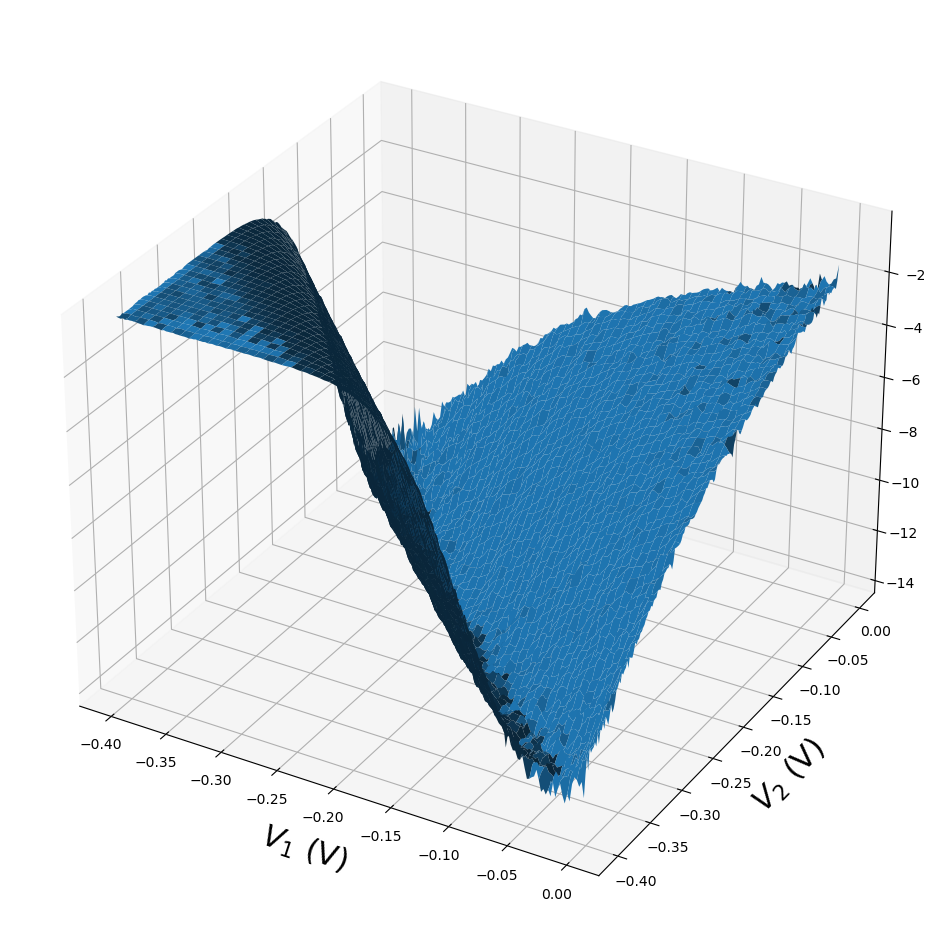

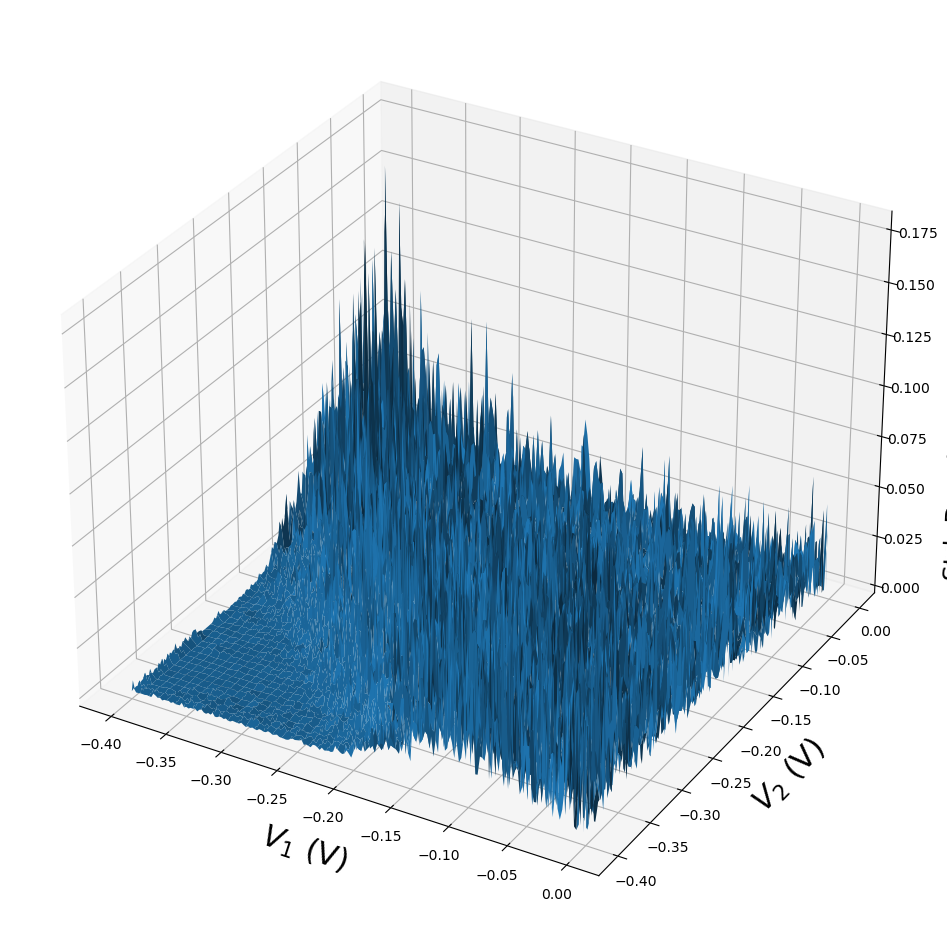

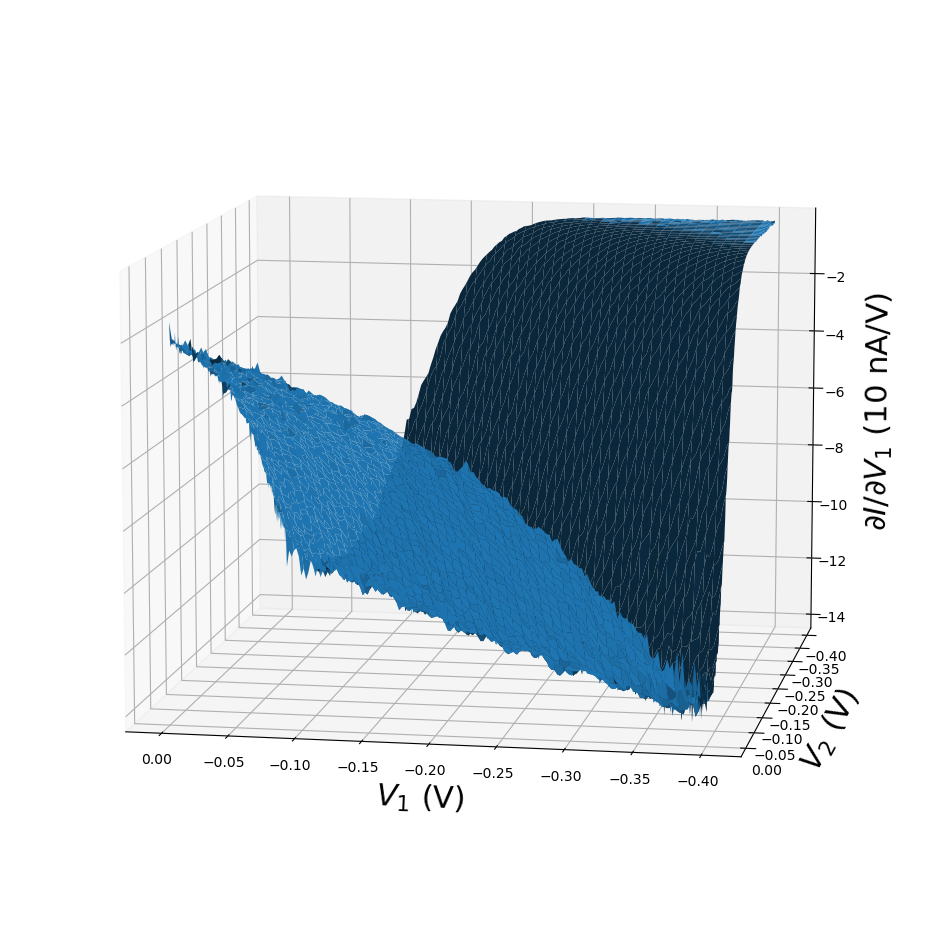

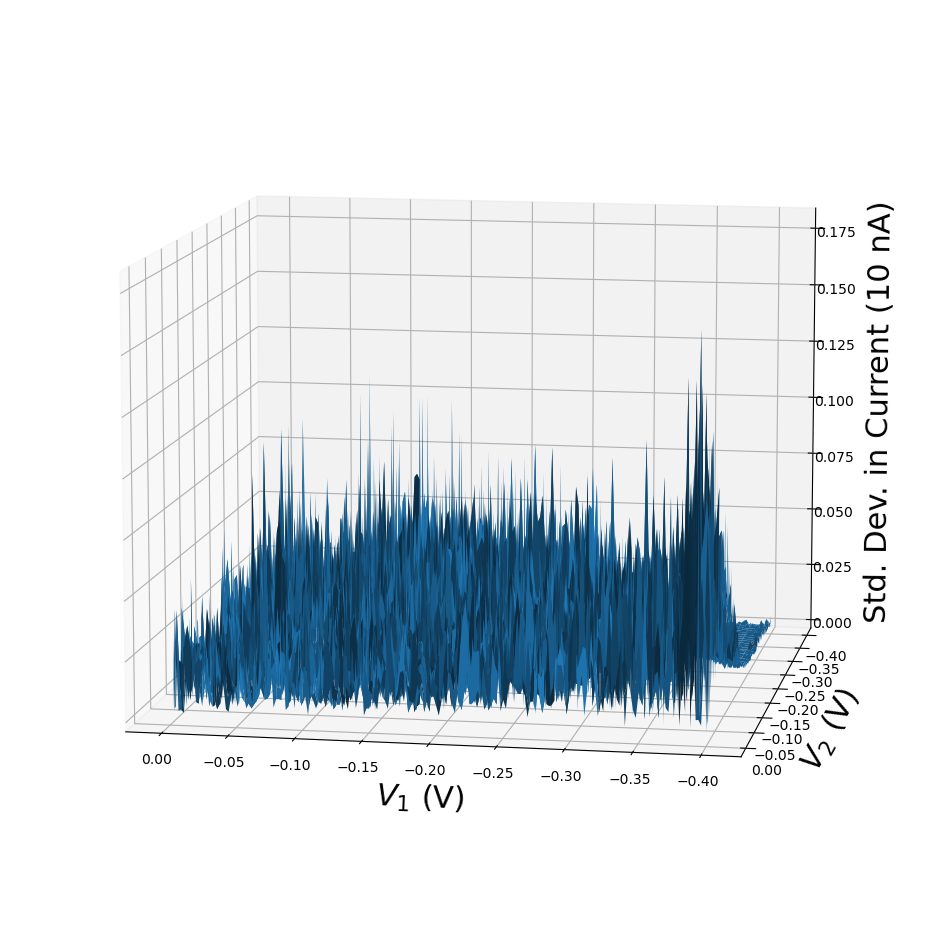

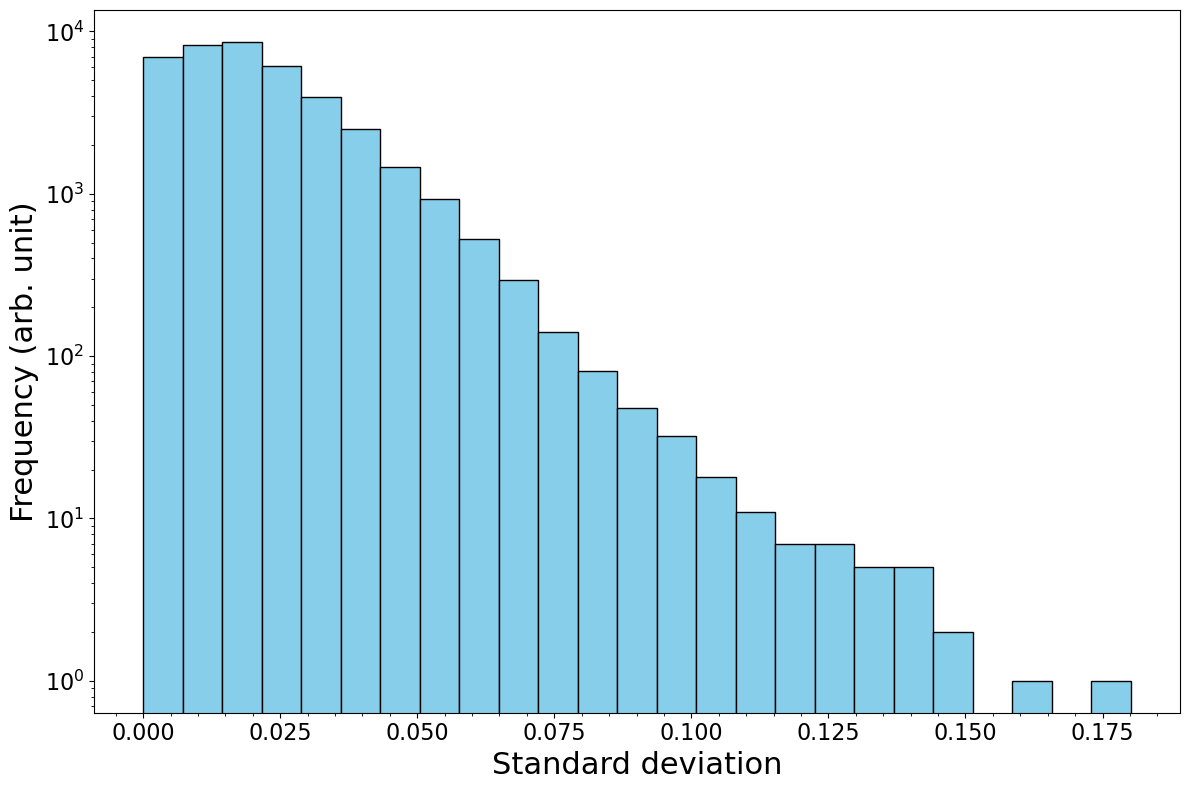

0.02111135411136389 0.01578524807293138


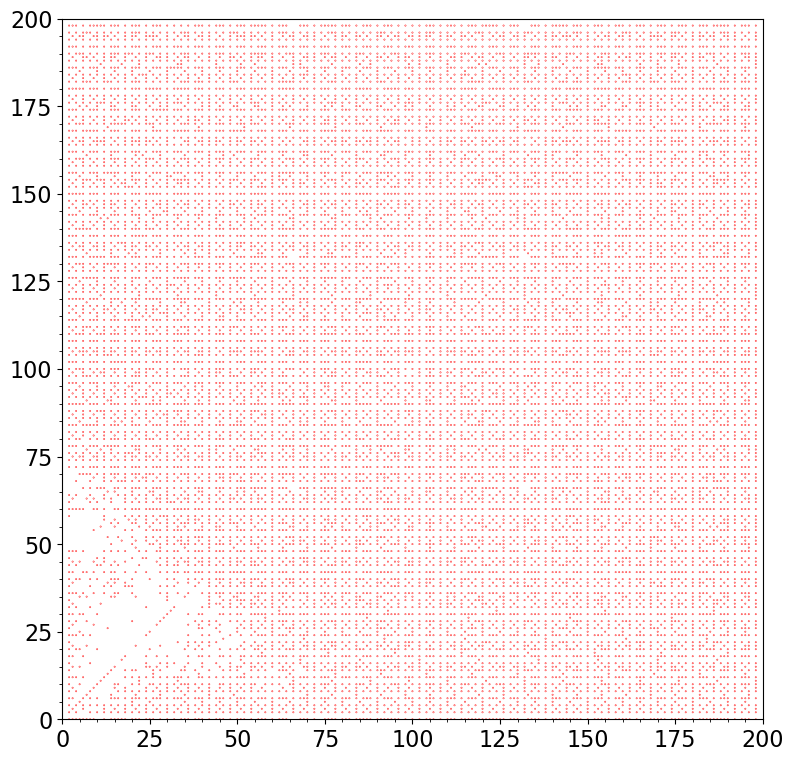

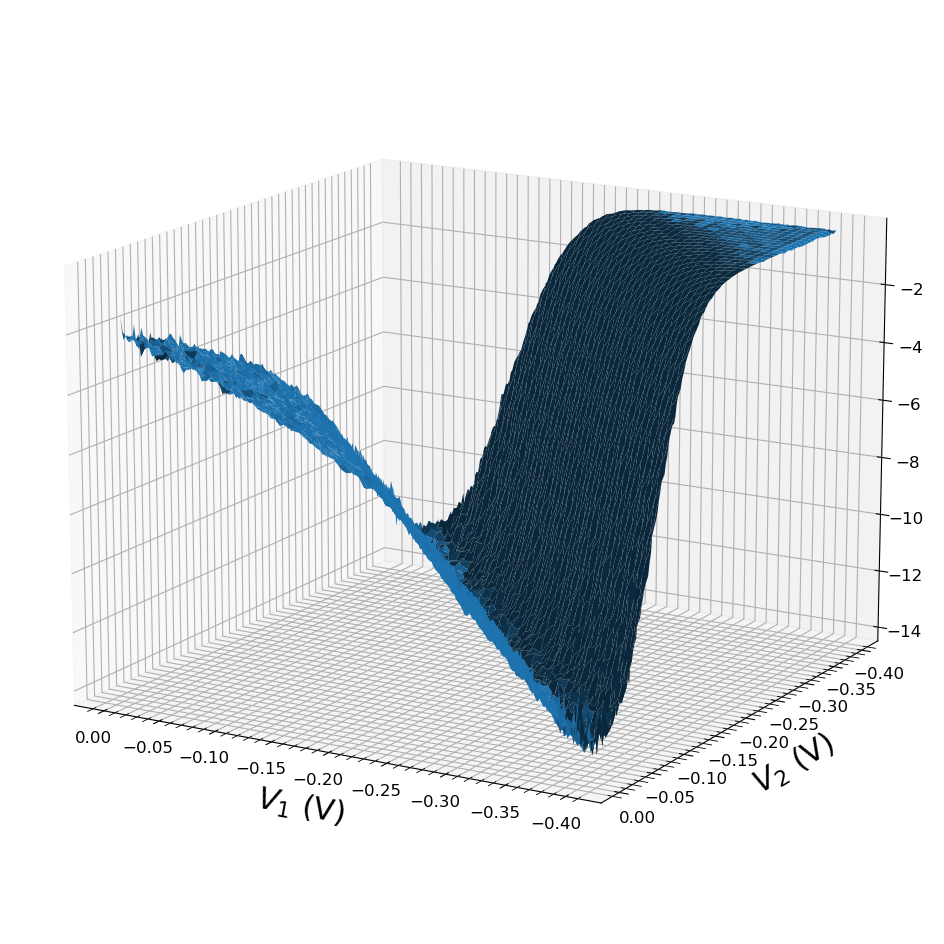

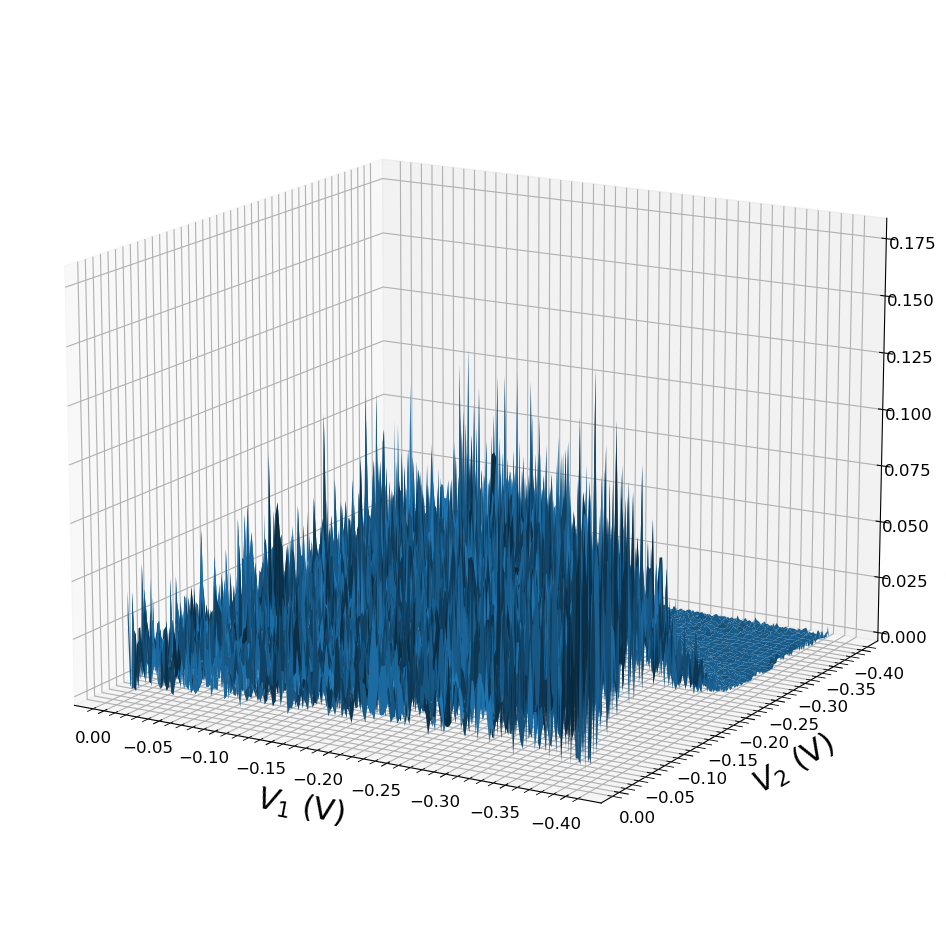

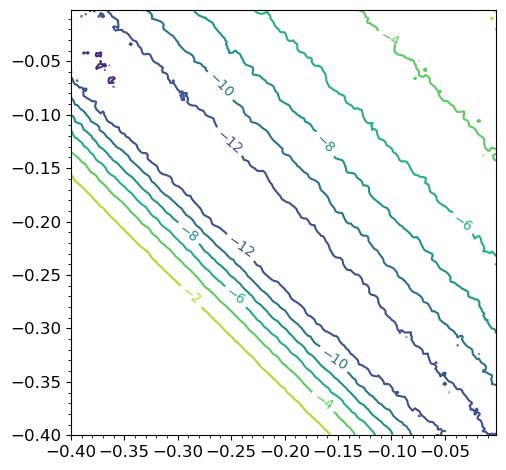

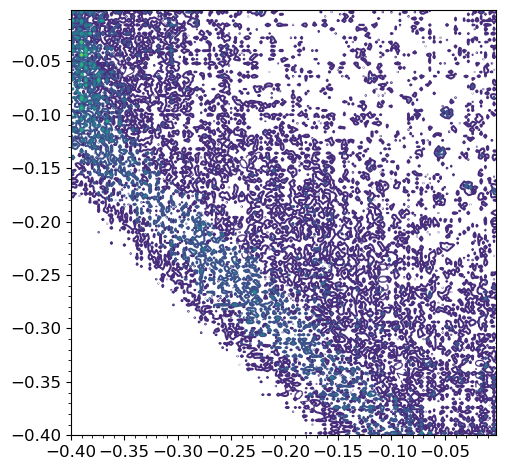

-14.193602280695478 -0.020339178333353285
0.0 0.18012867601709506


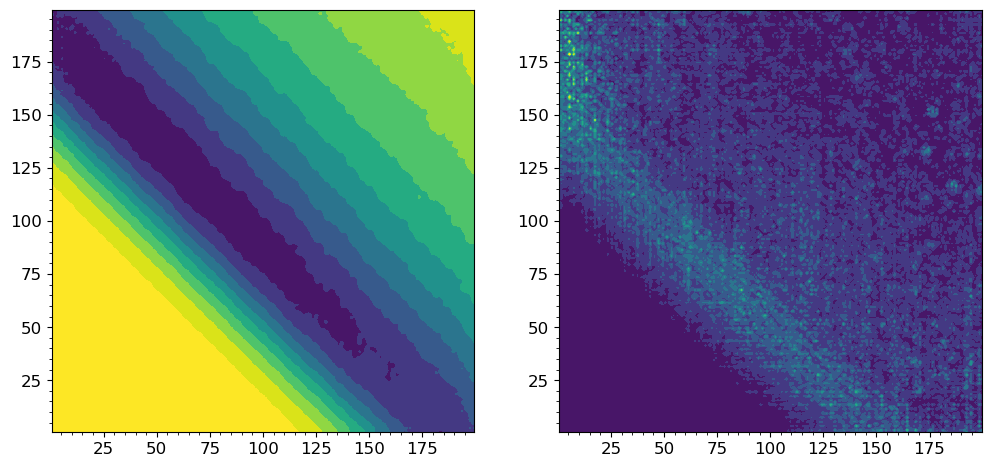

27.965226888656616 0.4660871148109436


In [12]:
Info.a0 = -20.
Info.a1 = 20.
Info.b0 = -20.
Info.b1 = 20.
Info.tolsig = 1e-3

if True:
    Info.a0 = -0.4
    Info.a1 = 0
    Info.b0 = -0.4
    Info.b1 = -0

Info.ntrain0 = 36
Info.nn1 = 200
Info.nn2 = 200

Info.fname_accum = 'daccum.txt'
Info.gname_accum = 'accum.txt'

if True:
    Info.rm = pyvisa.ResourceManager()
    print(Info.rm.list_resources())
    Info.yokogawa = Info.rm.open_resource(
        "GPIB0::11::INSTR", write_termination='\n', read_termination='\n')
    Info.multimeter = Info.rm.open_resource(
        "GPIB0::22::INSTR", write_termination='\n', read_termination='\n')
    Info.yokogawa2 = Info.rm.open_resource(
        "GPIB0::7::INSTR", write_termination='\n', read_termination='\n')
    Info.yokogawa.write("F1R5O1E")
    Info.yokogawa2.write("F1R5O1E")

driver1()

In [16]:
class Info:
    icase = 6
    icmd = 1
    a0 = -20.
    a1 = 20.
    b0 = -20.
    b1 = 20.
    ndim = 2
    ntrain0 = 36
    nn1 = 200
    nn2 = 200
    tolsig = 1e-3
    models12 = False
    rm = None
    yokogawa = None
    yokogawa2 = None
    multimeter = None
    fname_accum = 'daccum.txt'
    gname_accum = 'accum.txt'

In [17]:
if True:
    Info.rm = pyvisa.ResourceManager()
    print(Info.rm.list_resources())
    Info.yokogawa = Info.rm.open_resource(
        "GPIB0::11::INSTR", write_termination='\n', read_termination='\n')
    Info.multimeter = Info.rm.open_resource(
        "GPIB0::22::INSTR", write_termination='\n', read_termination='\n')
    Info.yokogawa2 = Info.rm.open_resource(
        "GPIB0::7::INSTR", write_termination='\n', read_termination='\n')
    Info.yokogawa.write("F1R5O1E")
    Info.yokogawa2.write("F1R5O1E")


('GPIB0::2::INSTR', 'GPIB0::5::INSTR', 'GPIB0::6::INSTR', 'GPIB0::7::INSTR', 'GPIB0::11::INSTR', 'GPIB0::13::INSTR', 'GPIB0::22::INSTR')


In [18]:
Info.a0 = -20.
Info.a1 = 20.
Info.b0 = -20.
Info.b1 = 20.
Info.tolsig = 1e-3

if True:
    Info.a0 = -0.4
    Info.a1 = 0
    Info.b0 = -0.4
    Info.b1 = -0

Info.ntrain0 = 36
Info.nn1 = 200
Info.nn2 = 200

Info.fname_accum = 'daccum.txt'
Info.gname_accum = 'accum.txt'

200 200
157.04706835746765 2.6174511392911275


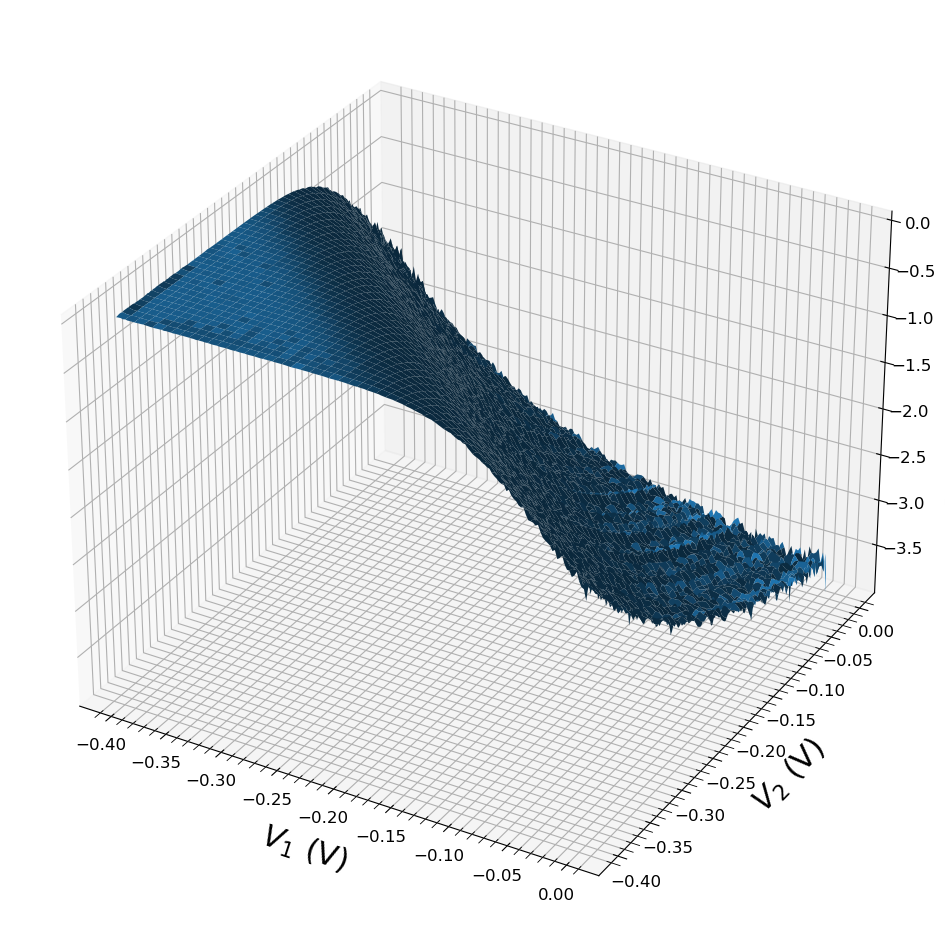

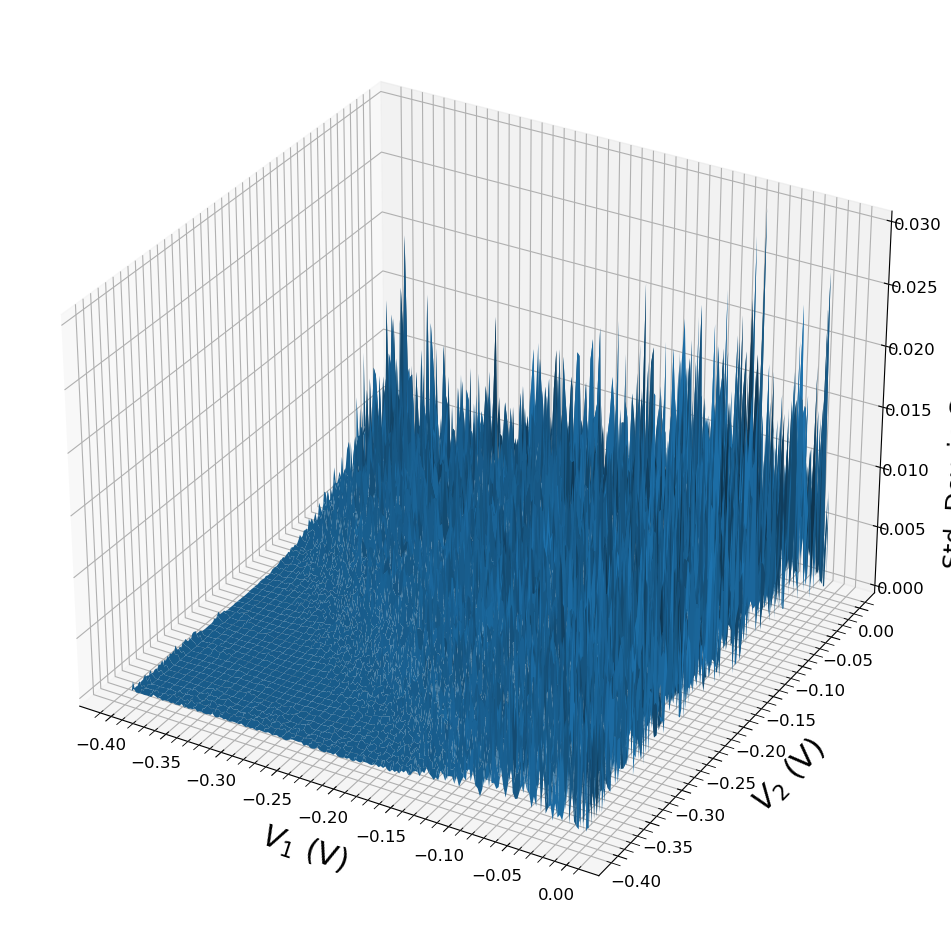

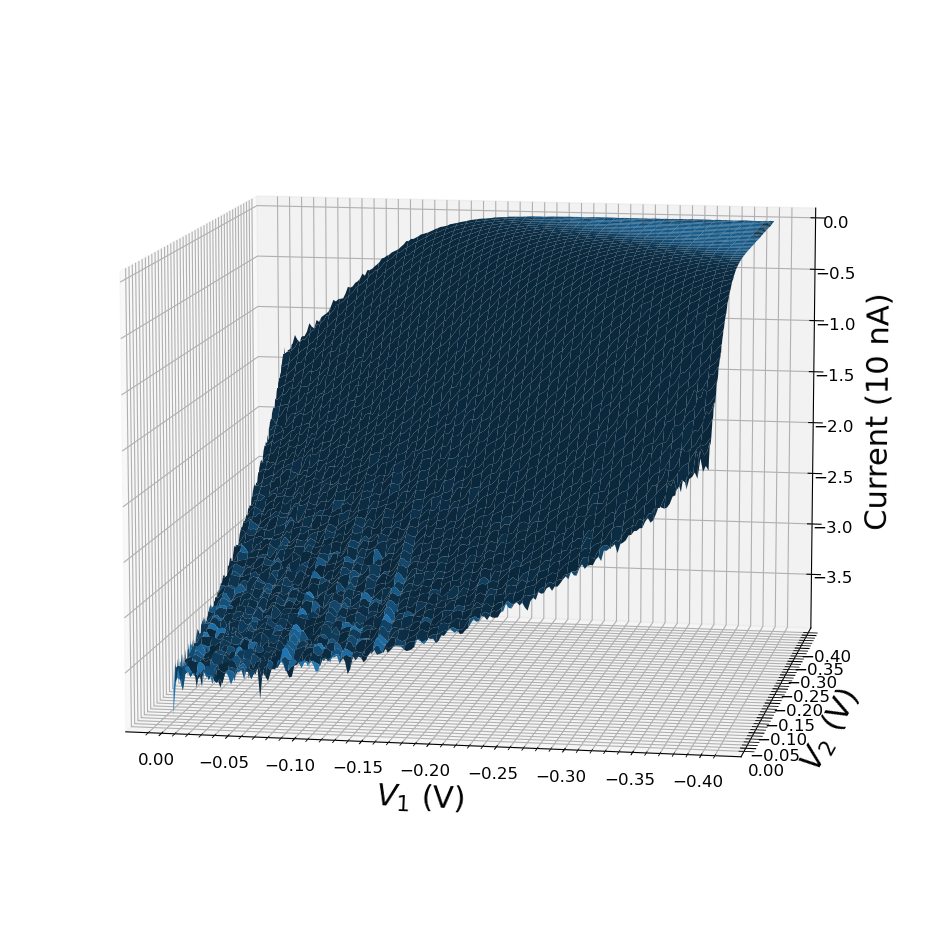

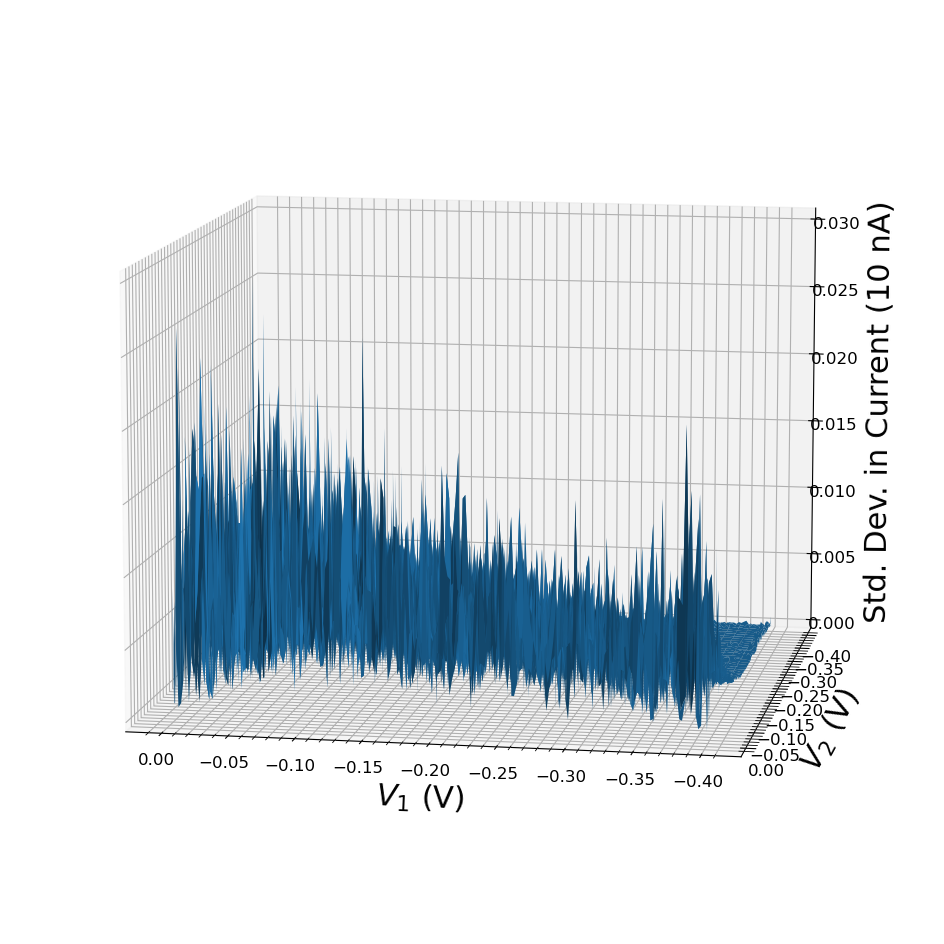

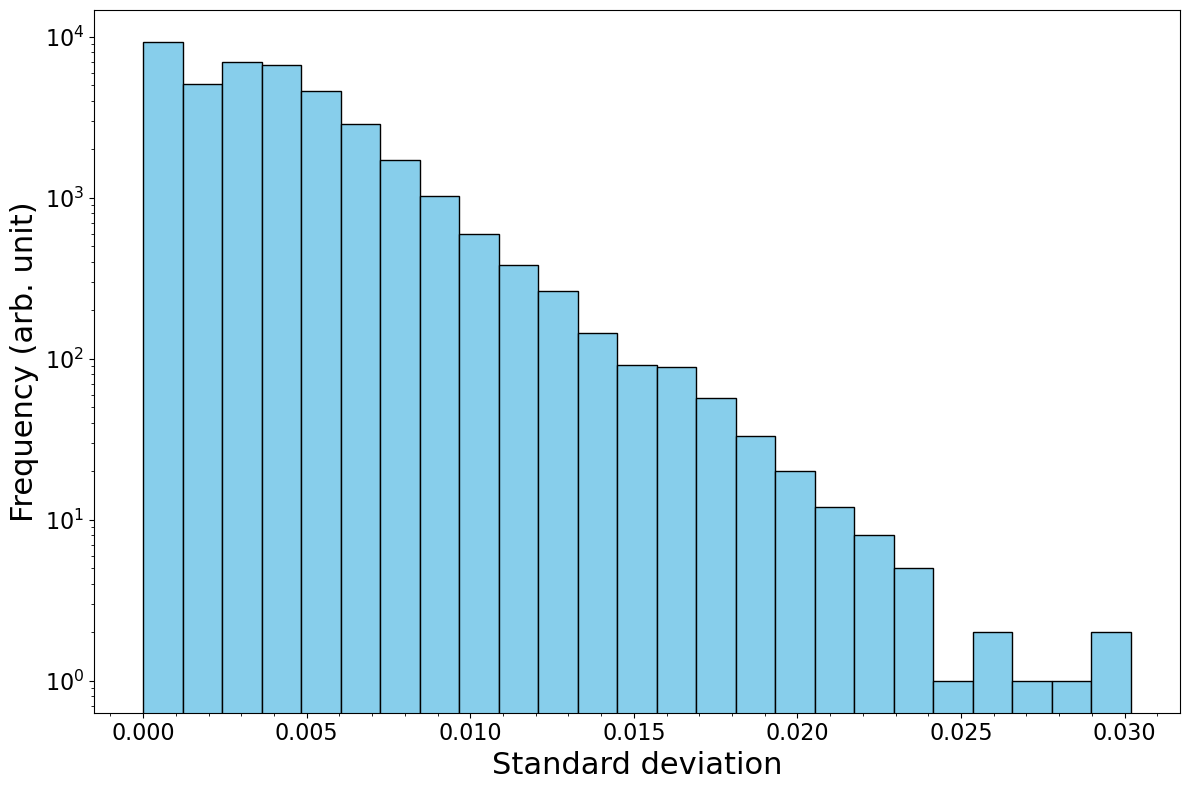

0.00374033948766007 0.0030520013520907584


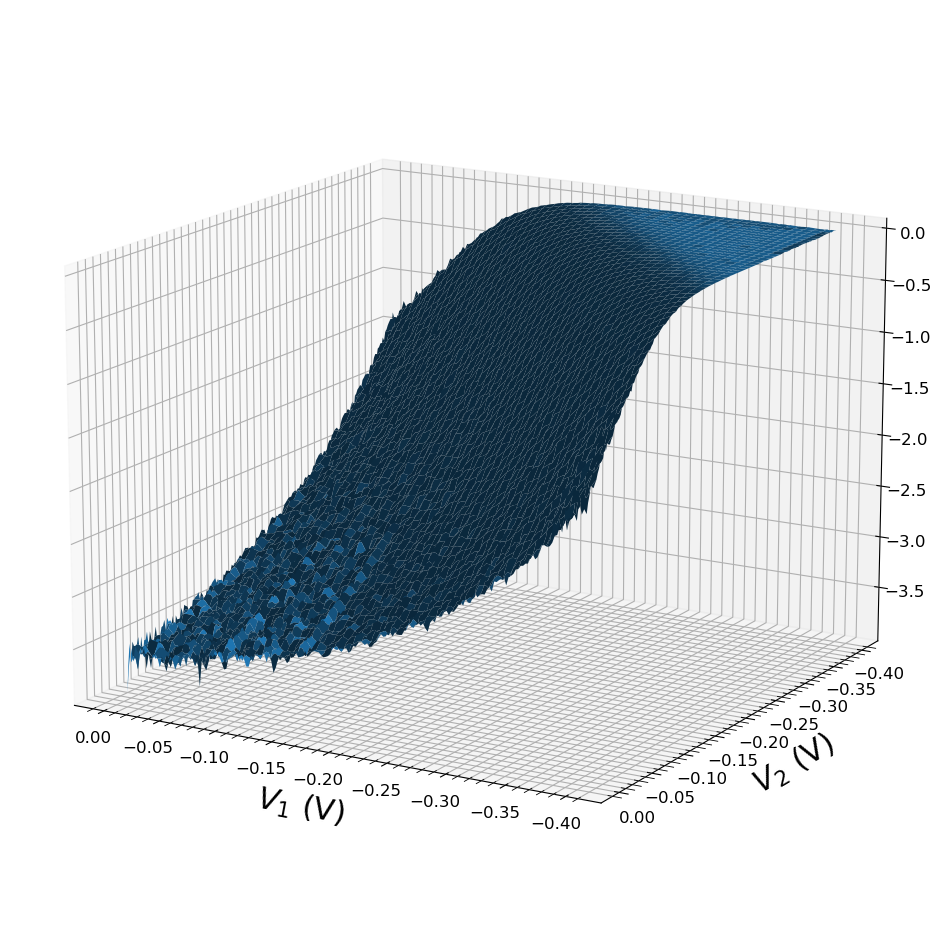

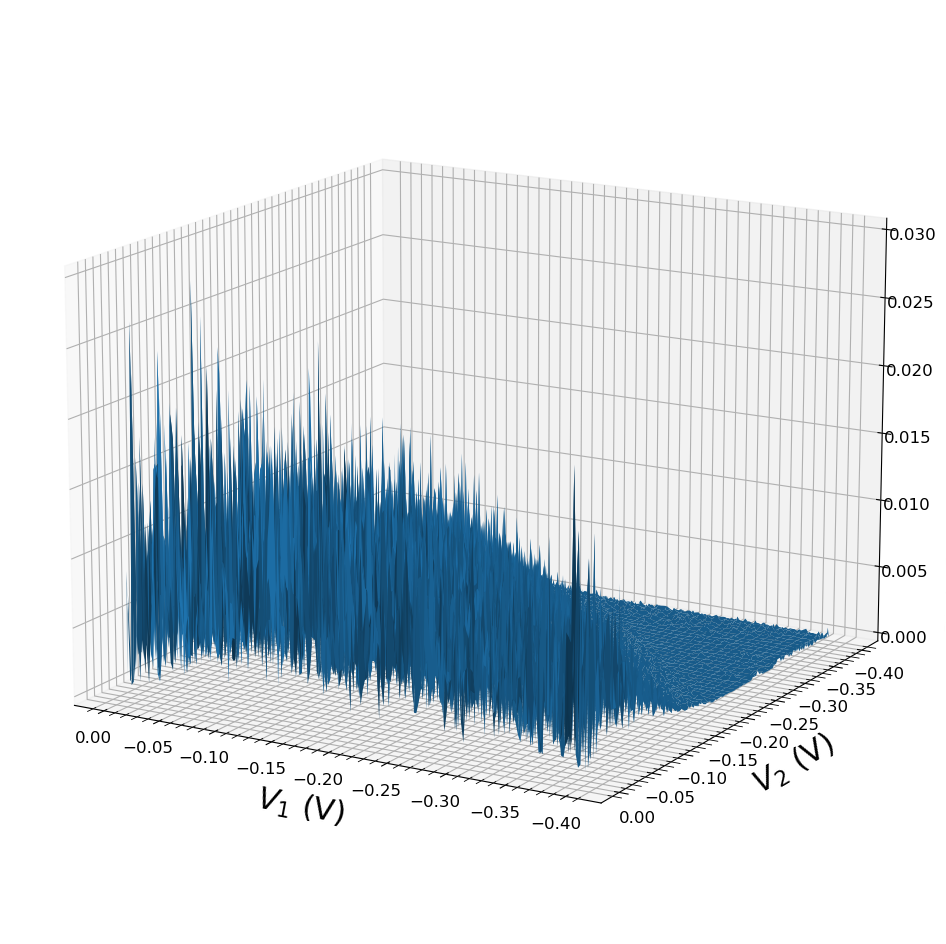

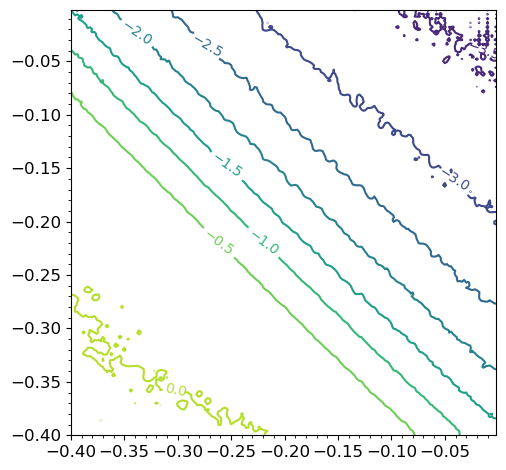

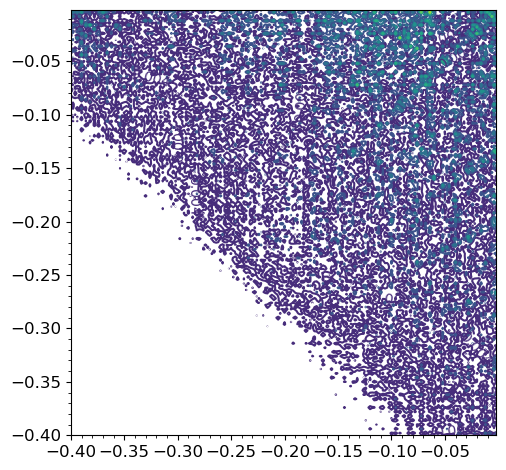

-3.950843441817073 0.012203433000727919
4.336808689942018e-19 0.030184638984545663


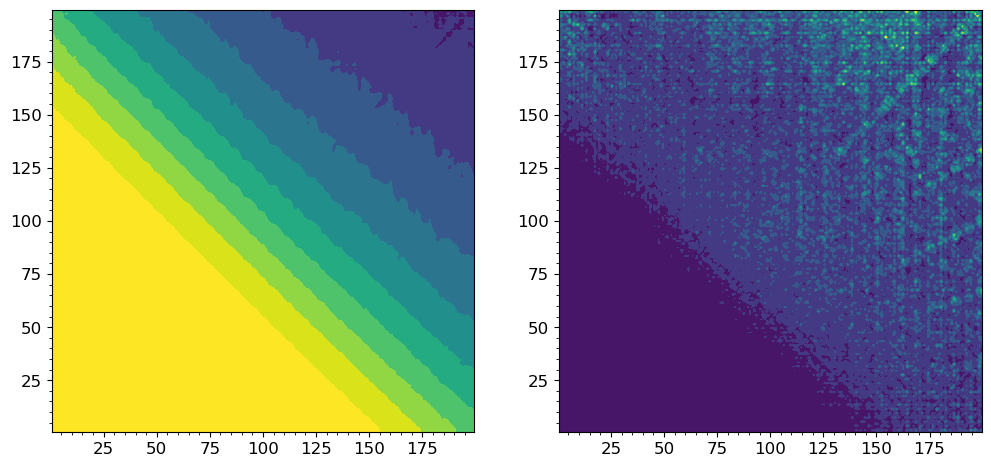

17.046048164367676 0.28410080273946126


In [19]:
Info.fname_accum = Info.gname_accum
Info.models12 = False
ndim = Info.ndim
nn1 = Info.nn1
nn2 = Info.nn2
a0 = Info.a0
a1 = Info.a1
b0 = Info.b0
b1 = Info.b1

multi = Multi_knn(ndim, Info.models12)
X_test = np.zeros((1, ndim))
y_pred, y_std = multi.tpredict(X_test)

if True:
    start = time.time()
    mm1 = nn1*1
    mm2 = nn2*1
    mm1 = int(mm1)
    mm2 = int(mm2)
#    print(ntrain, mm1*mm2, float(ntrain)/float(mm1*mm2))
    b = np.arange(a0, a1, (a1-a0)/mm1)
    d = np.arange(b0, b1, (b1-b0)/mm2)
    B, D = np.meshgrid(b, d)
    n, m = B.shape
    print(n, m)
    nu = np.zeros((n, m))
    st = np.zeros((n, m))
    X_test = np.zeros((1, ndim))
    for i in range(n):
        for j in range(m):
            X_test[0, 0] = B[i, j]
            X_test[0, 1] = D[i, j]
            y_pred, y_std = multi.predict(X_test)
            nu[i, j] = y_pred
            st[i, j] = y_std
    end = time.time()
    print(end - start, (end-start)/60.)

    start = time.time()
    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (10 nA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (10 nA)',
                  fontsize=18, rotation=0, labelpad=14)
    plt.savefig('std.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    ax.view_init(elev=10., azim=100.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (10 nA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean1.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    ax.view_init(elev=10., azim=100.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (10 nA)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('std1.pdf')
    plt.show()
    plt.close()


######
    result = st.flatten()
    fig = plt.figure(figsize=(12, 8))
    plt.rcParams["xtick.minor.visible"] = True
    plt.rcParams["ytick.minor.visible"] = True
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.hist(result, bins=25, color='skyblue', edgecolor='black')
    plt.xlabel('Standard deviation', fontsize=22)
    plt.ylabel('Frequency (arb. unit)', fontsize=22)
    plt.yscale('log')
    plt.xticks(fontsize=16)
#    plt.yticks(fontsize=19, rotation=0)
#    plt.tick_params(axis='both', which='major', labelsize=12)
#    plt.rc('xtick',labelsize=18)
#    plt.rc('ytick',labelsize=22)
    plt.tight_layout()
    plt.savefig('sig_dist_knn.pdf')
    plt.show()
    plt.close()
    print(np.mean(result), np.std(result))

    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    ax.view_init(elev=15., azim=120.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (10 nA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean2.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    ax.view_init(elev=15., azim=120.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (10 nA)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('std2.pdf')
    plt.show()
    plt.close()

    fig, ax = plt.subplots()
    CS = ax.contour(B, D, nu)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_aspect('equal', 'box')
    #ax.set_title('Simplest default with labels')
    plt.tight_layout()
    plt.savefig('mean_c.pdf')
    plt.show()
    plt.close()

    fig, ax = plt.subplots()
    CS = ax.contour(B, D, st)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_aspect('equal', 'box')
    #ax.set_title('Simplest default with labels')
    plt.tight_layout()
    plt.savefig('std_c.pdf')
    plt.show()
    plt.close()

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    ax1.set_aspect('equal', 'box')
    ax2.set_aspect('equal', 'box')
    amax = np.max(nu)
    amin = np.min(nu)
    print(amin, amax)
    tmz = (amax-amin)/10.
    ax1.contourf(nu, levels=np.arange(amin, amax, tmz),
                 extend='both', origin="lower")
    amax = np.max(st)
    amin = np.min(st)
    print(amin, amax)
    tmz = (amax-amin)/10.
    ax2.contourf(st, levels=np.arange(amin, amax, tmz),
                 extend='both', origin="lower")
    plt.savefig('mean_std.pdf')
    plt.show()
    plt.close()

    end = time.time()
    print(end - start, (end-start)/60.)